# Signal evolution in Spiral 3DREAM
adapted from: Ehses P, Brenner D, Stirnberg R, Pracht ED, Stöcker T. Whole‐brain B 1 ‐mapping using three‐dimensional DREAM. Magn Reson Med. 2019;82:924–934.

## Python standard libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Signal calculation (with M0=1); beta = 5

In [2]:
# sequence parameters:
alpha5 = 50          # [°]
alpha_rad5 = alpha5 * np.pi/180 # [rad]
beta5 = 5          # [°]
beta_rad5 = beta5 * np.pi/180 # [rad]

T15 = 784e-3         # [s]
TR5 = 7.2e-3         # [s]

r15 = 1/T15           # [1/s]
r1sat5 = -np.log10(np.cos(beta_rad5)) / TR5 # [1/s]
r1star5 = r15 + r1sat5 # [1/s]

Nint5 = 3
Nz5 = 20
prepscans5 = 0

# time vector:
t5 = np.arange(0,(prepscans5+Nint5*Nz5)*TR5,TR5) # [s]

# STE:
S0_ste5 = 1/2 * np.sin(beta_rad5) * np.sin(alpha_rad5)**2
S_ste5 = S0_ste5 * np.exp(-r1star5*t5)

# FID:
S0_fid5 = np.sin(beta_rad5) * np.cos(alpha_rad5)**2
Sstst_fid5 = np.sin(beta_rad5) * (1-np.exp(-r15*TR5)) / (1-np.cos(beta_rad5)*np.exp(-r15*TR5))
S_fid5 = Sstst_fid5 + (S0_fid5 - Sstst_fid5) * np.exp(-r1star5*t5)

## Signal calculation (with M0=1); beta = 15

In [3]:
# sequence parameters:
alpha = 50          # [°]
alpha_rad = alpha * np.pi/180 # [rad]
beta = 15          # [°]
beta_rad = beta * np.pi/180 # [rad]

T1 = 784e-3         # [s]
TR = 7.2e-3         # [s]

r1 = 1/T1           # [1/s]
r1sat = -np.log10(np.cos(beta_rad)) / TR # [1/s]
r1star = r1 + r1sat # [1/s]

Nint = 3
Nz = 20
prepscans = 0

# time vector:
t = np.arange(0,(prepscans+Nint*Nz)*TR,TR) # [s]

# STE:
S0_ste = 1/2 * np.sin(beta_rad) * np.sin(alpha_rad)**2
S_ste = S0_ste * np.exp(-r1star*t)

# FID:
S0_fid = np.sin(beta_rad) * np.cos(alpha_rad)**2
Sstst_fid = np.sin(beta_rad) * (1-np.exp(-r1*TR)) / (1-np.cos(beta_rad)*np.exp(-r1*TR))
S_fid = Sstst_fid + (S0_fid - Sstst_fid) * np.exp(-r1star*t)

## Signal plotting

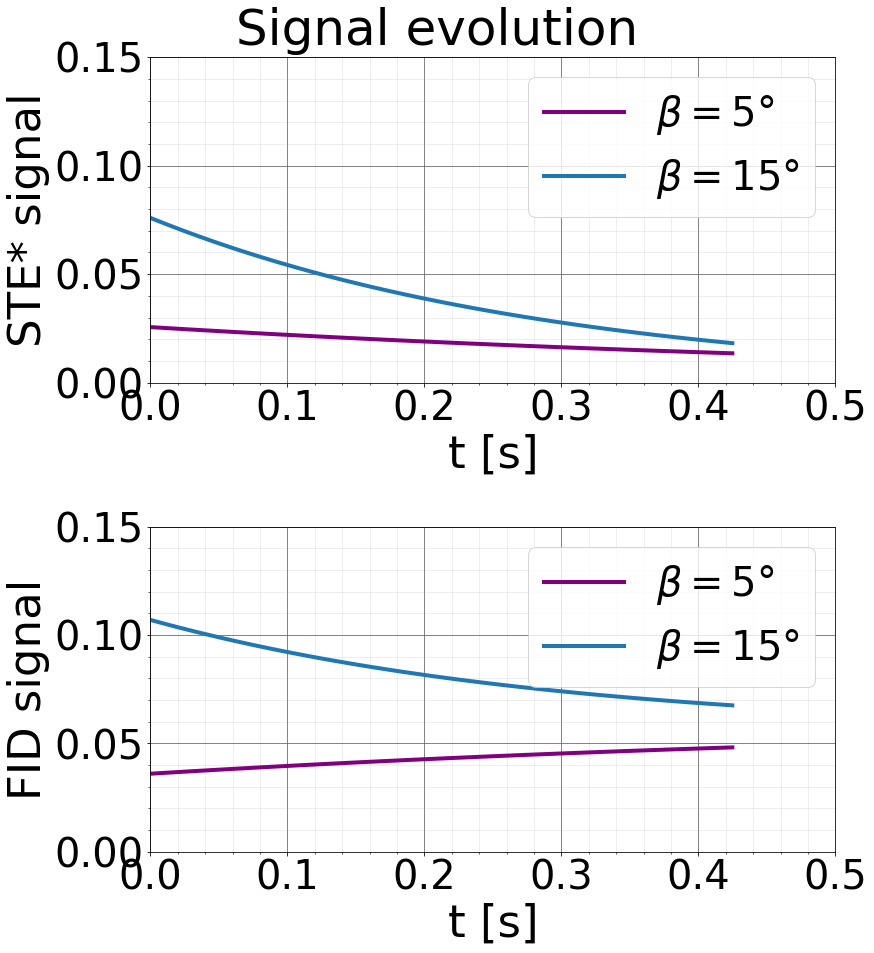

In [6]:
fig = plt.figure(figsize=[12,12])
fig.suptitle('Signal evolution', fontsize=50)

plt.subplot(2,1,1)
plt.plot(t,S_ste5, color = 'purple', linewidth=4)
plt.plot(t,S_ste, linewidth=4)
plt.ylabel('STE* signal', fontsize=45)
plt.xlabel('t [s]', fontsize=45)
plt.xlim([0,0.5])
plt.ylim([0,0.15])
plt.legend([r'$\beta = 5°$',r'$\beta = 15°$'], fontsize=40)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.tick_params(labelsize=40)
plt.tight_layout(pad=0.2,h_pad=5)

plt.subplot(2,1,2)
plt.plot(t,S_fid5, color = 'purple',linewidth=4)
plt.plot(t,S_fid, linewidth=4)
plt.ylabel('FID signal', fontsize=45)
plt.xlabel('t [s]', fontsize=45)
plt.xlim([0,0.5])
plt.ylim([0,0.15])
plt.legend([r'$\beta = 5°$',r'$\beta = 15°$'], fontsize=40)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.tick_params(labelsize=40)